In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 9s 2us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle","Boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'Boot']

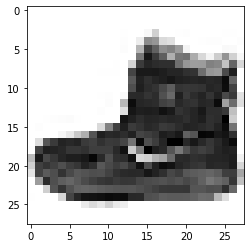

In [9]:
plt.imshow(X_train[0],cmap='Greys')

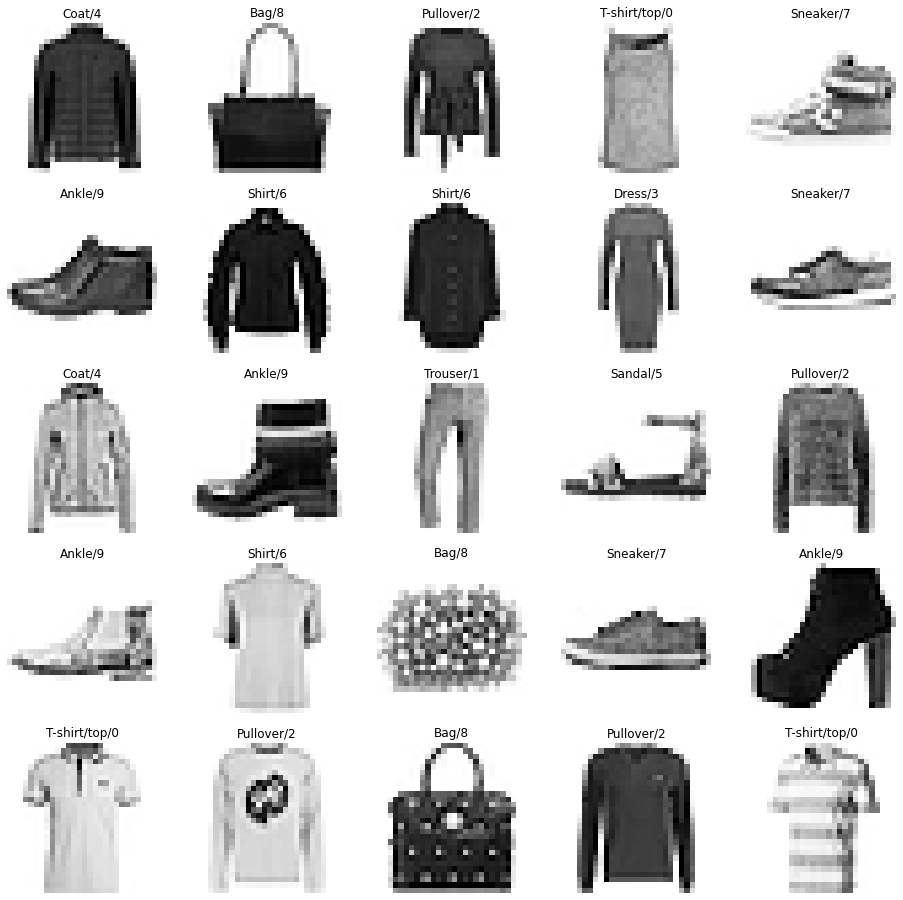

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))
    

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)


In [13]:
X_train.ndim

4

In [14]:
X_test = np.expand_dims(X_test,-1)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [18]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
    ])

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=5,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/5
94/94 [==============================] - 9s 89ms/step - loss: 0.6408 - accuracy: 0.7833 - val_loss: 0.4253 - val_accuracy: 0.8528
Epoch 2/5
94/94 [==============================] - 8s 87ms/step - loss: 0.3886 - accuracy: 0.8638 - val_loss: 0.3732 - val_accuracy: 0.8708
Epoch 3/5
94/94 [==============================] - 9s 96ms/step - loss: 0.3352 - accuracy: 0.8826 - val_loss: 0.3505 - val_accuracy: 0.8769
Epoch 4/5
94/94 [==============================] - 9s 96ms/step - loss: 0.3075 - accuracy: 0.8911 - val_loss: 0.3209 - val_accuracy: 0.8867
Epoch 5/5
94/94 [==============================] - 9s 97ms/step - loss: 0.2871 - accuracy: 0.8983 - val_loss: 0.3127 - val_accuracy: 0.8919


In [25]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.08, 0.  , 0.89],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.03, 0.  ]], dtype=float32)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.8859


[0.32052862644195557, 0.8859000205993652]

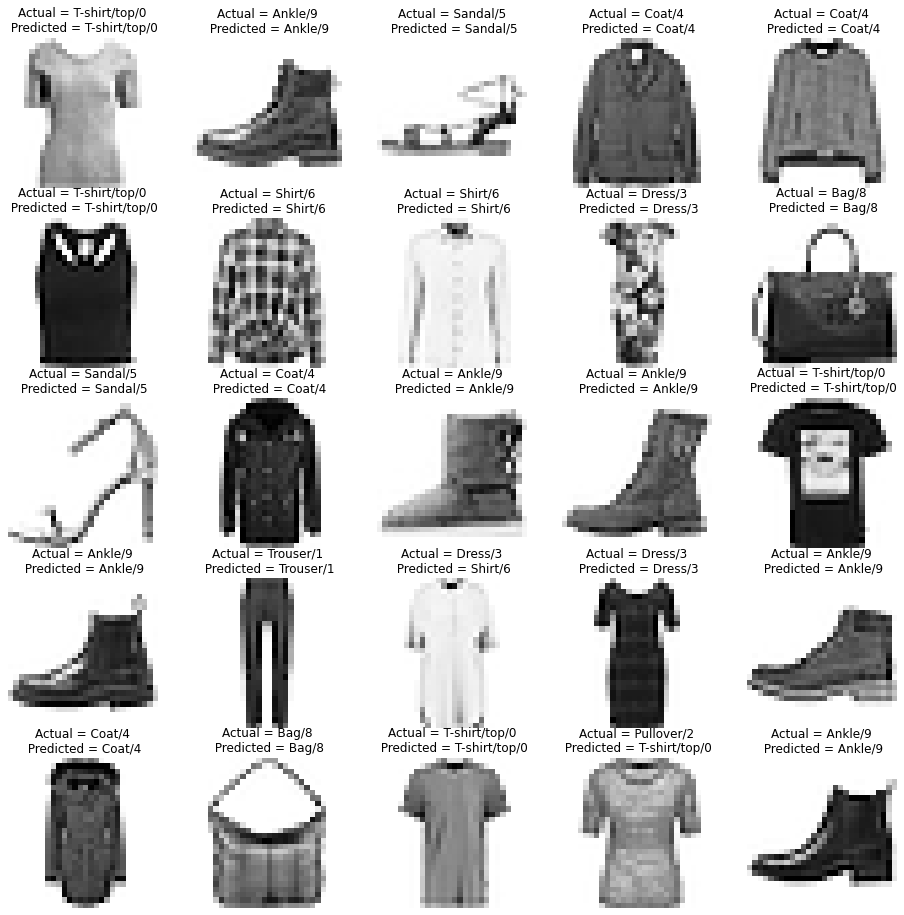

In [28]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
    plt.title('Actual = {}/{}\n Predicted = {}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

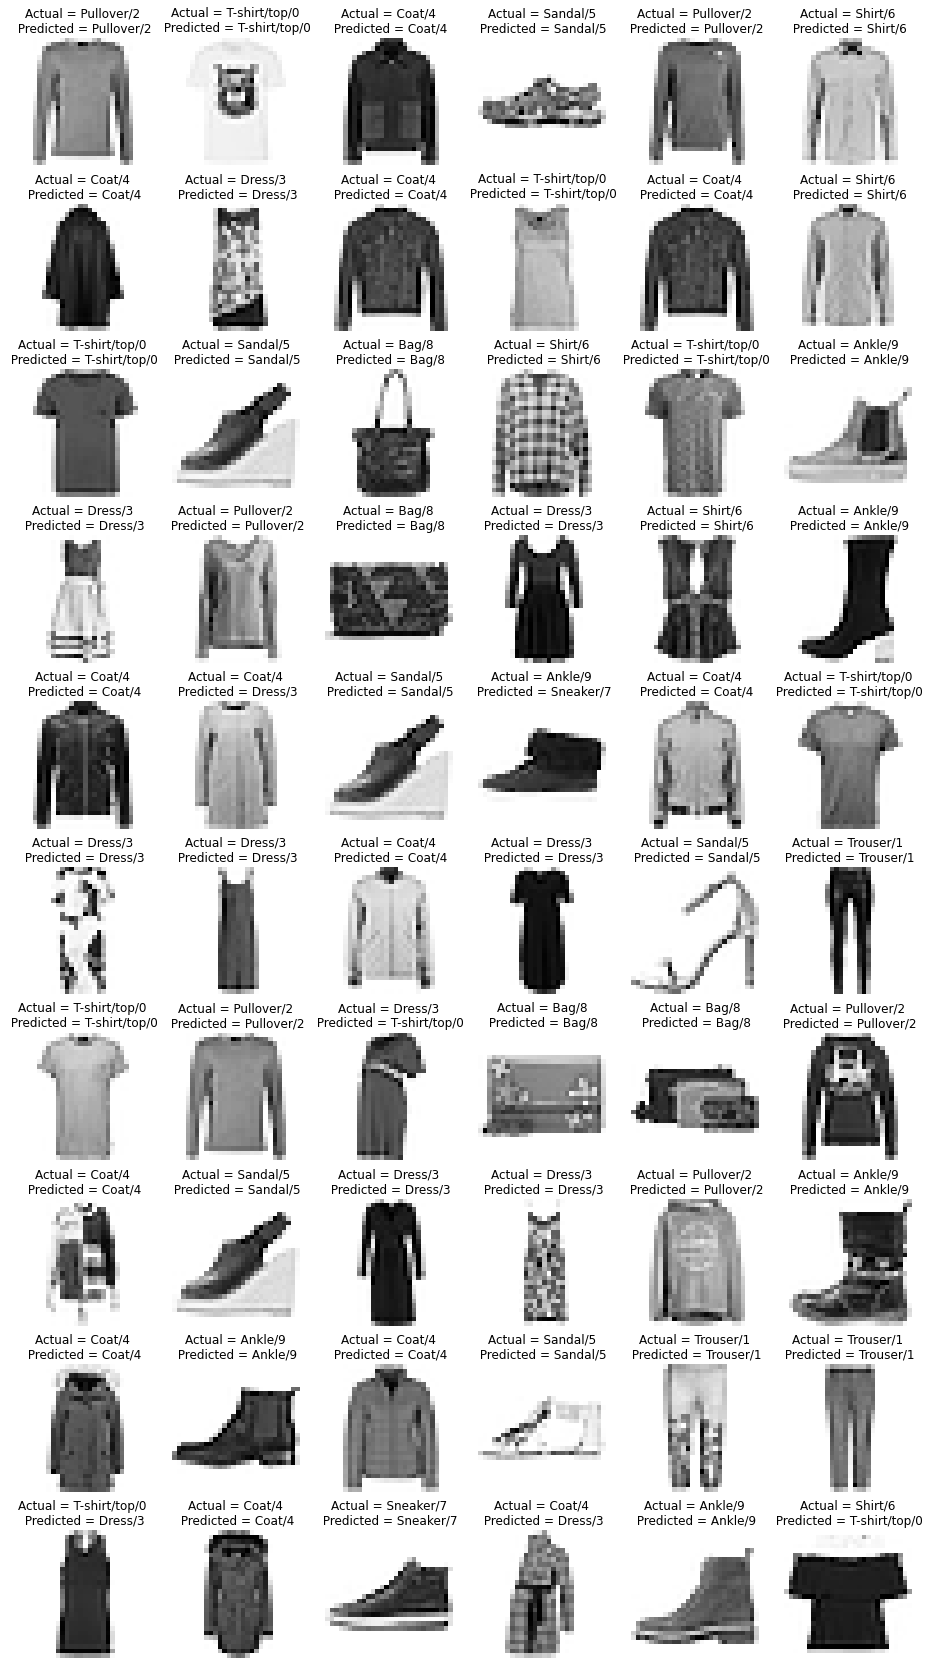

In [29]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j)
    j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
    plt.title('Actual = {}/{}\n Predicted = {}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

ValueError: Number of classes, 10, does not match size of target_names, 11. Try specifying the labels parameter

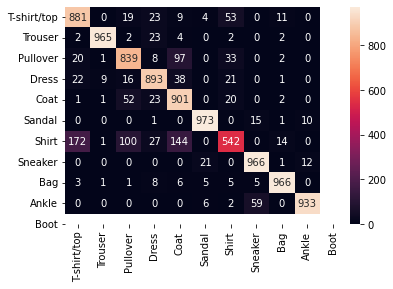

In [33]:
sns.heatmap(cm,annot = True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [34]:
model.save("fashion_mnist_cnn_model.h5")